## Mini-Project 4 (Part I): Solving Tic-Tac-Toe Using Minimax 


#### CSC 215 Artificial Intelligence (Fall 2019)

#### Dr. Haiquan Chen, California State University, Sacramento

In [1]:
import random
import time

current = []


def show(board, player):
    print(player, ":\n")
    for i in range(3):
        for j in range(9):
            if j // 3 == i:
                print(" ", board[j], end="  |")
        print()
        print("------------------")


def check_line(char, pos1, pos2, pos3):
    return pos1 == pos2 == pos3 == char


def check_all(board, char):
    if check_line(char, board[0], board[1], board[2]):
        return True
    elif check_line(char, board[3], board[4], board[5]):
        return True
    elif check_line(char, board[6], board[7], board[8]):
        return True
    elif check_line(char, board[0], board[3], board[6]):
        return True
    elif check_line(char, board[1], board[4], board[7]):
        return True
    elif check_line(char, board[2], board[5], board[8]):
        return True
    elif check_line(char, board[0], board[4], board[8]):
        return True
    elif check_line(char, board[2], board[4], board[6]):
        return True
    else:
        return False


def check_draw(board):
    
    # check if all the night cells have been used on the board (i.e., there is no number left)
    return set(board) == {"o", "x"}   


# check if the game is over.   If that is the case, return the score
def check_game_over(board):
    if check_all(board, "x"):
        return 10
    elif check_all(board, "o"):
        return -10
    elif check_draw(board):
        return 0
    else: 
        return False

def availableMoves(board):
    #Return empty spaces on the board
    moves = []
    for i in range(0, len(board)):
        if board[i] != "x" and board[i] != "o":
            moves.append(i)
    return moves

def makeMove(board,position, player):
    #Make a move on the board
    board[position] = player
    return board

def changePlayer(player):
    #Returns the opposite player given any player
    if player == "x":
        return "o"
    else:
        return "x"


def minimax(board, player):    # return the minimax score of a node
    global current
    current_score = check_game_over(board)
    
    if current_score is not False:
        return current_score
    
    # if the game is not over, do the following
    scores = []
    moves = []
    x_win = False
    o_win = False
    
    # check all possible moves. 
    availablemoves = availableMoves(board)
    
    for i in availablemoves:
        new_board = board.copy()
        node = {}
        new_board = makeMove(new_board , i , player)
        node['move'] = new_board
        
        score = minimax(new_board,changePlayer(player))
        node['score'] = score
            
        moves.append(node)    
    
    
    if player == "x":   
        best_score = -100
        best_node = node
        # Find the move with the highest score.   Add that move to current and return that score. 
        for node in moves:
            if node['score'] > best_score:
                best_score = node['score']
                best_node = node
        current.append(best_node['move']) 
        
    if player == "o":
        best_score = 100
        best_node = node
        # Find the move with the lowest score.   Add that move to current and return that score.
       
        for node in moves:
            if node['score'] < best_score:
                best_score = node['score']
                best_node = node
        current.append(best_node['move'])   
        
    return best_score
    
    
      

## Optimal vs Optimal

In [10]:
import time
def optimal_vs_optimal():
    global current
    board = [0, 1, 2, 3, 4, 5, 6, 7, 8]
    current = []
    print("Player x and Player o Both play optimally.\n")
    
   
    show(board, "Board")
    print()
    curr = ["x", "o"]
    i = 0
    
    
    
    while True:
                           
        minimax(board, curr[i])
        show(current[len(current) - 1], curr[i])
        board = current[len(current) - 1]
        
        print()
        
        if check_all(board, curr[i]):
            print(curr[i] + " Wins!")
            result.append(curr[i] + 'win')
            return curr[i]
        elif check_draw(board):
            print("Draw!")
            result.append('draw')
            return "Draw"
        i = (i + 1) % 2

start_time = time.time()

optimal_vs_optimal()
 
print("\nSeconds Elapsed:", time.time() - start_time)

Player x and Player o Both play optimally.

Board :

  0  |  1  |  2  |
------------------
  3  |  4  |  5  |
------------------
  6  |  7  |  8  |
------------------

x :

  x  |  1  |  2  |
------------------
  3  |  4  |  5  |
------------------
  6  |  7  |  8  |
------------------

o :

  x  |  1  |  2  |
------------------
  3  |  o  |  5  |
------------------
  6  |  7  |  8  |
------------------

x :

  x  |  x  |  2  |
------------------
  3  |  o  |  5  |
------------------
  6  |  7  |  8  |
------------------

o :

  x  |  x  |  o  |
------------------
  3  |  o  |  5  |
------------------
  6  |  7  |  8  |
------------------

x :

  x  |  x  |  o  |
------------------
  3  |  o  |  5  |
------------------
  x  |  7  |  8  |
------------------

o :

  x  |  x  |  o  |
------------------
  o  |  o  |  5  |
------------------
  x  |  7  |  8  |
------------------

x :

  x  |  x  |  o  |
------------------
  o  |  o  |  x  |
------------------
  x  |  7  |  8  |
------------

In [8]:
import time
result = []
def optimal_vs_optimal():
    global current
    board = [0, 1, 2, 3, 4, 5, 6, 7, 8]
    current = []
    #print("Player x and Player o Both play optimally.\n")
    
   
    #show(board, "Board")
    #print()
    curr = ["x", "o"]
    i = 0
    
    
    
    while True:
                           
        minimax(board, curr[i])
        #show(current[len(current) - 1], curr[i])
        board = current[len(current) - 1]
        
        #print()
        
        if check_all(board, curr[i]):
            #print(curr[i] + " Wins!")
            result.append(curr[i] + 'win')
            return curr[i]
        elif check_draw(board):
            #print("Draw!")
            result.append('draw')
            return "Draw"
        i = (i + 1) % 2

start_time = time.time()
for i in range(100):
    optimal_vs_optimal()
print(result)    
print("\nSeconds Elapsed:", time.time() - start_time)

['draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw', 'draw']

Seconds Elapsed: 438.76165890693665


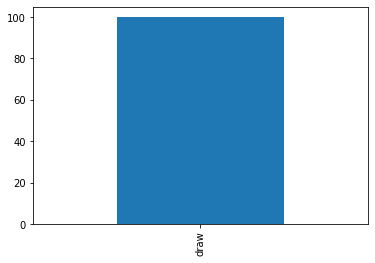

In [9]:
import pandas as pd
df = pd.Series(result)
df.value_counts().plot(kind = 'bar')

## Random vs Optimal

In [2]:
def random_vs_optimal():
    global current
    board = [0, 1, 2, 3, 4, 5, 6, 7, 8]
    current = []
    print("Player x plays randomly, and Player o plays optimally.\n")
    show(board, "Board")
    print()
    curr = ["x", "o"]
    i = 0
    
    while True:
        print()
        if curr[i] == "x":
            valid_choice = [i for i in range(9) if board[i] != "x" and board[i] != "o"]
            ran = valid_choice[int(random.random() * len(valid_choice))]
            board[ran] = "x"
            show(board, "x")
            
        elif curr[i] == "o":
            minimax(board, "o")
            show(current[len(current) - 1], "o")
            board = current[len(current) - 1]
            
        print()
        
        if check_all(board, curr[i]):
            print(curr[i] + " Wins!")
            return curr[i]
        elif check_draw(board):
            print("Draw!")
            return "Draw"
        i = (i + 1) % 2

start_time = time.time()
random_vs_optimal()
print("\nSeconds Elapsed:", time.time() - start_time)

Player x plays randomly, and Player o plays optimally.

Board :

  0  |  1  |  2  |
------------------
  3  |  4  |  5  |
------------------
  6  |  7  |  8  |
------------------


x :

  x  |  1  |  2  |
------------------
  3  |  4  |  5  |
------------------
  6  |  7  |  8  |
------------------


o :

  x  |  1  |  2  |
------------------
  3  |  o  |  5  |
------------------
  6  |  7  |  8  |
------------------


x :

  x  |  x  |  2  |
------------------
  3  |  o  |  5  |
------------------
  6  |  7  |  8  |
------------------


o :

  x  |  x  |  o  |
------------------
  3  |  o  |  5  |
------------------
  6  |  7  |  8  |
------------------


x :

  x  |  x  |  o  |
------------------
  3  |  o  |  5  |
------------------
  6  |  x  |  8  |
------------------


o :

  x  |  x  |  o  |
------------------
  o  |  o  |  5  |
------------------
  6  |  x  |  8  |
------------------


x :

  x  |  x  |  o  |
------------------
  o  |  o  |  x  |
------------------
  6  |  x  |

'o'

In [4]:
result=[]
def random_vs_optimal():
    global current
    board = [0, 1, 2, 3, 4, 5, 6, 7, 8]
    current = []
    #print("Player x plays randomly, and Player o plays optimally.\n")
    #show(board, "Board")
    #print()
    curr = ["x", "o"]
    i = 0
    
    while True:
        #print()
        if curr[i] == "x":
            valid_choice = [i for i in range(9) if board[i] != "x" and board[i] != "o"]
            ran = valid_choice[int(random.random() * len(valid_choice))]
            board[ran] = "x"
            #show(board, "x")
            
        elif curr[i] == "o":
            minimax(board, "o")
            #show(current[len(current) - 1], "o")
            board = current[len(current) - 1]
            
        #print()
        
        if check_all(board, curr[i]):
            #print(curr[i] + " Wins!")
            result.append(curr[i] + ' Wins')
            return curr[i]
        elif check_draw(board):
            #print("Draw!")
            result.append('Draw')
            return "Draw"
        i = (i + 1) % 2

start_time = time.time()
for i in range(100):
    random_vs_optimal()
print(result) 
print("\nSeconds Elapsed:", time.time() - start_time)

['o Wins', 'Draw', 'o Wins', 'o Wins', 'o Wins', 'o Wins', 'o Wins', 'Draw', 'o Wins', 'o Wins', 'o Wins', 'o Wins', 'Draw', 'o Wins', 'o Wins', 'Draw', 'Draw', 'o Wins', 'o Wins', 'o Wins', 'o Wins', 'Draw', 'o Wins', 'Draw', 'o Wins', 'o Wins', 'o Wins', 'o Wins', 'Draw', 'o Wins', 'Draw', 'Draw', 'o Wins', 'o Wins', 'o Wins', 'o Wins', 'o Wins', 'o Wins', 'o Wins', 'Draw', 'o Wins', 'o Wins', 'o Wins', 'o Wins', 'o Wins', 'Draw', 'o Wins', 'o Wins', 'o Wins', 'o Wins', 'o Wins', 'o Wins', 'o Wins', 'o Wins', 'o Wins', 'o Wins', 'o Wins', 'o Wins', 'o Wins', 'o Wins', 'o Wins', 'o Wins', 'o Wins', 'o Wins', 'o Wins', 'o Wins', 'Draw', 'o Wins', 'Draw', 'o Wins', 'o Wins', 'Draw', 'o Wins', 'o Wins', 'Draw', 'o Wins', 'o Wins', 'Draw', 'o Wins', 'o Wins', 'o Wins', 'o Wins', 'Draw', 'o Wins', 'o Wins', 'o Wins', 'o Wins', 'o Wins', 'o Wins', 'o Wins', 'Draw', 'o Wins', 'o Wins', 'o Wins', 'o Wins', 'o Wins', 'o Wins', 'Draw', 'Draw', 'o Wins']

Seconds Elapsed: 46.326828718185425


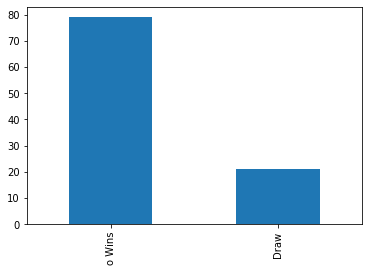

In [6]:
import pandas as pd
df = pd.Series(result)
df.value_counts().plot(kind = 'bar')

## You vs Optimal

In [ ]:
def you_vs_optimal():
    global current
    board = [0, 1, 2, 3, 4, 5, 6, 7, 8]
    current = []
    print("You play as Player x, can you win the game?\n")
    show(board, "Board")
    print()
    curr = ["x", "o"]
    i = 0
    while True:
        if curr[i] == "x":
            valid_choice = [str(i) for i in range(9) if i in board]
            while True:
                cell = input("Please enter a valid cell (" + ", ".join(valid_choice) + "): ")
                if cell in valid_choice:
                    break
            print()
            board[int(cell)] = curr[i]
            show(board, "x")
        elif curr[i] == "o":
            minimax(board, "o")
            show(current[len(current) - 1], "o")
            board = current[len(current) - 1]
        print()
        if check_all(board, curr[i]):
            print(curr[i] + " Wins!")
            return curr[i]
        if check_draw(board):
            print("Draw!")
            return "Draw"
        i = (i + 1) % 2

you_vs_optimal()

#### 